### Simple linear regression example

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
pd.read_csv('./Salary_dataset.csv').head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344
1,1,1.4,46206
2,2,1.6,37732
3,3,2.1,43526
4,4,2.3,39892


In [3]:
# WE USE THIS PATTERN TO AVOID THE COLUMN UNNAMMED
data = pd.read_csv('./Salary_dataset.csv',usecols=['YearsExperience','Salary'])
data.head(10)

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892
5,3.0,56643
6,3.1,60151
7,3.3,54446
8,3.3,64446
9,3.8,57190


In [4]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [6]:
data.shape

(30, 2)

In [7]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [8]:
data.isnull().mean()*100

YearsExperience    0.0
Salary             0.0
dtype: float64

In [9]:
data.duplicated().sum()

0

### Exploratory data analysis

#### Univariate analysis

##### Histogram

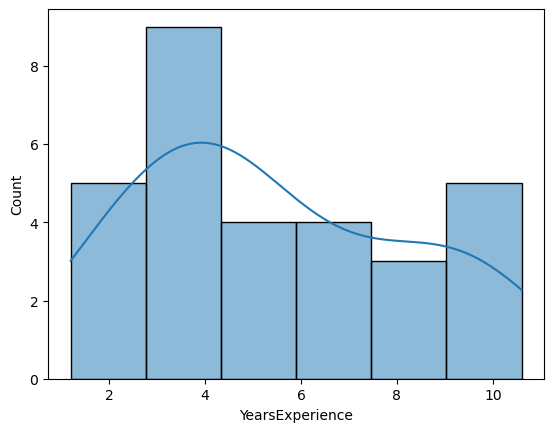

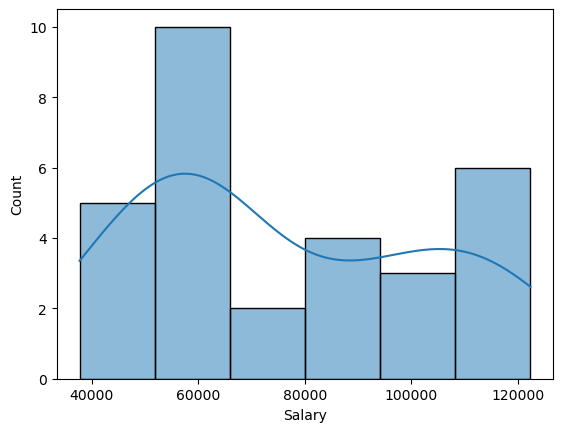

In [10]:
for i in data.columns:
    sns.histplot(x = data[i],kde=True)
    plt.show()

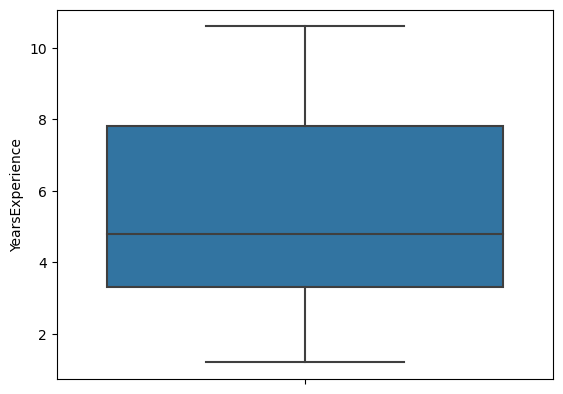

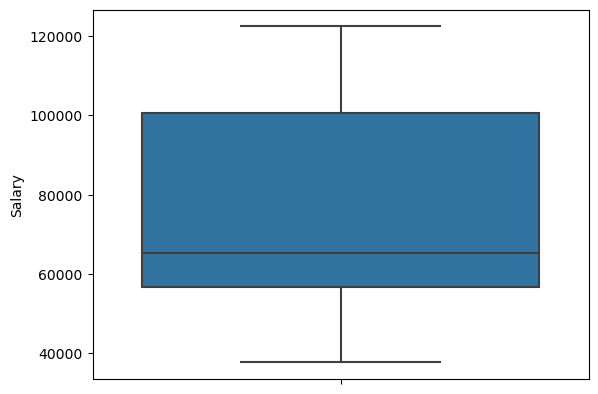

In [11]:
for i in data.columns:
    sns.boxplot(y = data[i])
    plt.show()

###### There are no outliers

### Multivariate analysis

#### scatter plot

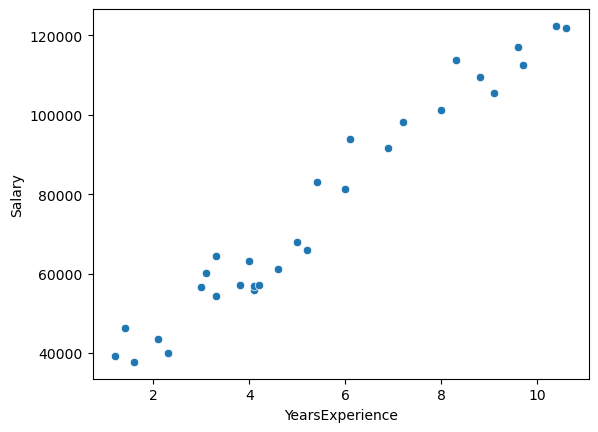

In [12]:
sns.scatterplot(data = data, x = 'YearsExperience', y = 'Salary')
plt.show()

### Heat map

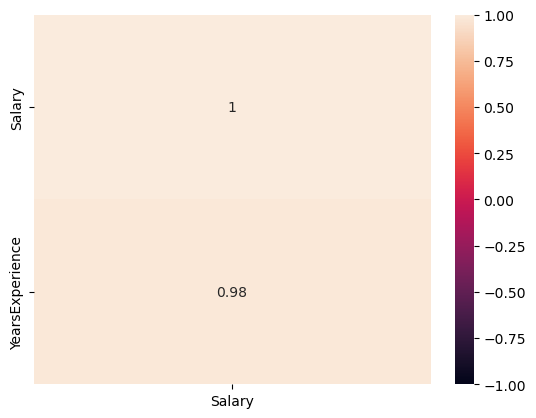

In [13]:
sns.heatmap(data.corr()[['Salary']].sort_values(by = 'Salary',ascending=False),vmin = -1,annot= True)
plt.show()

In [14]:
# Just for understanding
data.iloc[1:5,:]

,YearsExperience,Salary
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [15]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
x
# taking values of x from data

array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [16]:
y

array([ 39344,  46206,  37732,  43526,  39892,  56643,  60151,  54446,
        64446,  57190,  63219,  55795,  56958,  57082,  61112,  67939,
        66030,  83089,  81364,  93941,  91739,  98274, 101303, 113813,
       109432, 105583, 116970, 112636, 122392, 121873], dtype=int64)

### Feature scaling

#### Initialising Standard Scaler

In [17]:
sc = StandardScaler()

In [18]:
x = sc.fit_transform(x)

In [19]:
x

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

#### Splitting the data into training and testing sets

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=46,shuffle=True)

### Model building

#### Initialising the model

In [21]:
model = LinearRegression()

### Fitting the model with training data

In [22]:
model.fit(x_train,y_train)

LinearRegression()

### Predicting using the test data

In [23]:
y_pred = model.predict(x_test)
y_pred

array([ 37525.85562159,  62405.37408295, 123647.26568012,  44224.18751503,
        63362.27863915, 108336.79278083])

### Evaluating the accuracy

In [24]:
r2_score(y_test,y_pred)

0.9789129767378081

### Testing accuracy

In [25]:
model.score(x_test,y_test)

0.9789129767378081

### Training accuracy

In [26]:
model.score(x_train,y_train)

0.948821675263085

In [27]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=['ACTUAL', 'PREDICTION'])

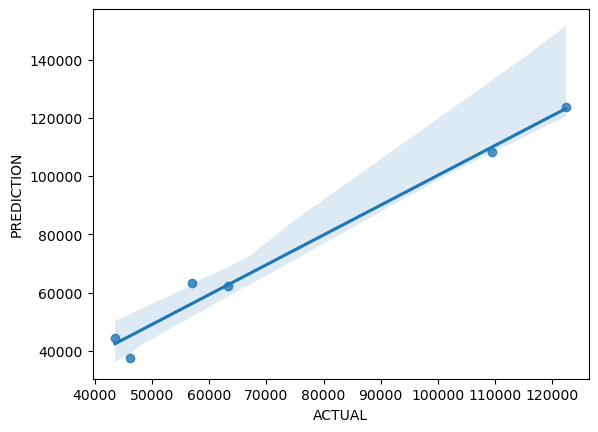

In [28]:
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTION')
plt.show()

[(46206, 37525.855621592375, array([-1.43837321])),
 (63219, 62405.3740829458, array([-0.50653674])),
 (122392, 123647.26568012348, array([1.78721455])),
 (43526, 44224.18751503367, array([-1.18749416])),
 (56958, 63362.2786391517, array([-0.47069688])),
 (109432, 108336.79278082907, array([1.21377673]))]

### Random forest

In [29]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor , GradientBoostingRegressor

### Random Forest Regressor

In [30]:
model2 = RandomForestRegressor()

In [31]:
model2.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
r2_score(y_test,y_pred)

0.9789129767378081

In [33]:
model2.score(x_test,y_test)

0.9786751850541101

In [34]:
model2.score(x_train,y_train)

0.9888980234653253

### RandomForestRegressor

In [40]:
model3 = AdaBoostRegressor()

In [41]:
model3.fit(x_train,y_train)

AdaBoostRegressor()

In [42]:
r2_score(y_test,y_pred)

0.9789129767378081

In [43]:
model3.score(x_test,y_test)

0.9839972717378264

In [44]:
model3.score(x_train,y_train)

0.9917681104249453

### GradientBoostingRegressor

In [45]:
model4 = GradientBoostingRegressor()

In [46]:
model4.fit(x_train,y_train)

GradientBoostingRegressor()

In [47]:
r2_score(y_test,y_pred)

0.9789129767378081

In [48]:
model4.score(x_test,y_test)

0.9781271302616065

In [50]:
model4.score(x_train,y_train)

0.9968034547508718